In [2]:
import torch
from torchvision.models import resnet18
from thop import profile,clever_format
model = resnet18()
input = torch.randn(1, 3, 224, 224) #模型输入的形状,batch_size=1
flops, total_params = profile(model, inputs=(input, ),verbose=False)
macs, params = clever_format([flops, total_params],'%.3f')
# print(flops/1e9,params/1e6,) #flops单位G，para单位M
print('macs:',macs)
print('params:',params)
print('flops:',flops/1e-3)

macs: 1.824G
params: 11.690M
flops: 1824033792000.0


In [6]:
import torch
from models.model_clam import CLAM_SB, CLAM_MB
from models.model_TransformerMIL import TransformerMIL_SB as TM
from models.model_MCBAT_triple import MCBAT_SB
from thop import profile, clever_format
model = MCBAT_SB()
input = torch.randn(100,1024)
input2 = torch.randn(2000,1024)
# flops, params = profile(model, inputs=(input, input2))
# print(f'FLOPS:{flops/1e9}G,Params:{params/1e6}M')

flops, total_params = profile(model, inputs=(input, input2),verbose=False)
macs, params = clever_format([flops, total_params],'%.3f')
# print(flops/1e9,params/1e6,) #flops单位G，para单位M
print('macs:',macs)
print('params:',params)

macs: 7.767G
params: 7.092M


: 

In [8]:
import torch
from models.model_clam import CLAM_SB, CLAM_MB
from models.model_TransformerMIL import TransformerMIL_SB as TM
from models.model_mil import MIL_fc
from models.model_MCBAT import MCBAT_SB
from thop import profile

model = CLAM_SB()
input = torch.randn(2000,1024)
flops, total_params = profile(model, inputs=(input, ),verbose=False)
macs, params = clever_format([flops, total_params],'%.3f')
print('macs:',macs)
print('params:',params)


macs: 1.573G
params: 788.739K


In [7]:
import torch
from models.model_MCBAT import FusionEncoder
from thop import profile, clever_format

model = FusionEncoder(4)
input = torch.randn(1,1000,512)
input2 = torch.randn(1,5000,512)
# flops, params = profile(model, inputs=(input, input2))
# print(f'FLOPS:{flops/1e9}G,Params:{params/1e6}M')

flops, total_params = profile(model, inputs=(input, input2),verbose=False)
macs, params = clever_format([flops, total_params]，'%.3f')
# print(flops/1e9,params/1e6,) #flops单位G，para单位M
print('macs:',macs)
print('params:',params)

macs: 0.00B
params: 0.00B


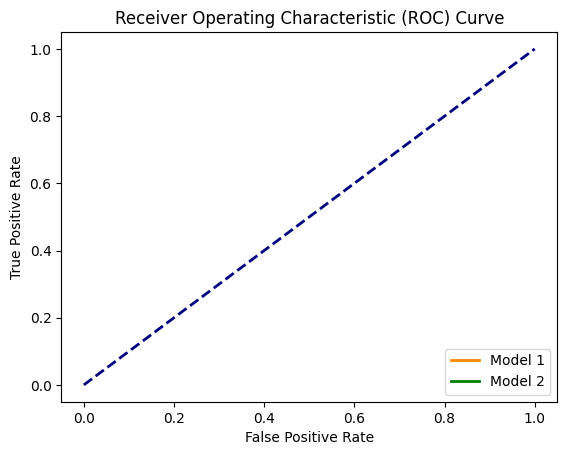

In [2]:
import matplotlib.pyplot as plt

# 假设 model1_fpr, model1_tpr 是模型1的 FPR 和 TPR
# 假设 model2_fpr, model2_tpr 是模型2的 FPR 和 TPR

# 绘制 ROC 曲线
plt.figure()
plt.plot(0.0908, 0.9125, color='darkorange', lw=2, label='Model 1')
plt.plot(0.0508, 0.9299, color='green', lw=2, label='Model 2')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve on TCGA-NSCLC')
plt.legend(loc="lower right")
plt.show()
